In [1]:
import os
import pandas as pd

In [2]:
# Specify the folder containing Parquet files
folder_path = 'C:\\Users\\clair\\MasterThesis\\Feature_selected_data\\'

# List all Parquet files in the folder
parquet_files = [file for file in os.listdir(folder_path) if file.endswith('.parquet')]

# Read each Parquet file into a DataFrame and assign it to a variable
for parquet_file in parquet_files:
    location_name = parquet_file.split('_')[0]  # Extract location name from file name
    file_path = os.path.join(folder_path, parquet_file)
    globals()[f"{location_name}_df"] = pd.read_parquet(file_path)

In [3]:
# Print the first few rows of each DataFrame
print(canyons_df.head())
print(disney_df.head())
print(miami_df.head())
print(vegas_df.head())

# Check the shape of each DataFrame
print(canyons_df.shape)
print(disney_df.shape)
print(miami_df.shape)
print(vegas_df.shape)

  Canyons Ski Resort_STATION_NUM Canyons Ski Resort_STATION_ID  \
0                              4                           SNC   
1                              4                           SNC   
2                              4                           SNC   
3                              4                           SNC   
4                              4                           SNC   

   Canyons Ski Resort_air_temp_set_1  Canyons Ski Resort_wind_speed_set_1  \
0                             8.9825                               0.4675   
1                             7.5175                               0.5150   
2                             6.3575                               0.3375   
3                             5.6200                               0.2925   
4                             6.0650                               0.5600   

   Canyons Ski Resort_solar_radiation_set_1  \
0                                  0.000000   
1                                  0.000000   

In [1]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt

# Canyons Ski Resort

Minimum Temperature: -3.02575
Maximum Temperature: 31.167
Mean Temperature: 10.625726494525452
Standard Deviation: 5.829365944623243


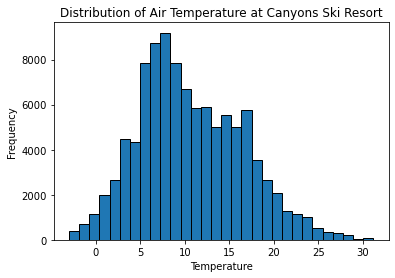

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Basic Statistics
min_temp = canyons_df['Canyons Ski Resort_air_temp_set_1'].min()
max_temp = canyons_df['Canyons Ski Resort_air_temp_set_1'].max()
mean_temp = canyons_df['Canyons Ski Resort_air_temp_set_1'].mean()
std_temp = canyons_df['Canyons Ski Resort_air_temp_set_1'].std()

print(f"Minimum Temperature: {min_temp}")
print(f"Maximum Temperature: {max_temp}")
print(f"Mean Temperature: {mean_temp}")
print(f"Standard Deviation: {std_temp}")

# Plotting the distribution
plt.hist(canyons_df['Canyons Ski Resort_air_temp_set_1'], bins=30, edgecolor='black')
plt.title('Distribution of Air Temperature at Canyons Ski Resort')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


Minimum Precip accum: 263.652
Maximum Precip accum: 280.924
Mean Precip accum: 271.5138334360179
Standard Deviation: 5.456702582055404


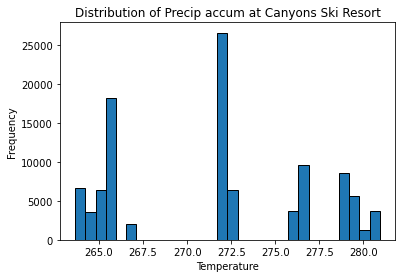

In [6]:
# Basic Statistics
min_precip = canyons_df['Canyons Ski Resort_precip_accum_set_1'].min()
max_precip = canyons_df['Canyons Ski Resort_precip_accum_set_1'].max()
mean_precip = canyons_df['Canyons Ski Resort_precip_accum_set_1'].mean()
std_precip = canyons_df['Canyons Ski Resort_precip_accum_set_1'].std()

print(f"Minimum Precip accum: {min_precip}")
print(f"Maximum Precip accum: {max_precip}")
print(f"Mean Precip accum: {mean_precip}")
print(f"Standard Deviation: {std_precip}")

# Plotting the distribution
plt.hist(canyons_df['Canyons Ski Resort_precip_accum_set_1'], bins=30, edgecolor='black')
plt.title('Distribution of Precip accum at Canyons Ski Resort')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


In [6]:
# Extract features
X = canyons_df.drop(columns=['Canyons Ski Resort_air_temp_set_1', 'Canyons Ski Resort_wind_speed_set_1', 'Canyons Ski Resort_solar_radiation_set_1', 'Canyons Ski Resort_precip_accum_set_1', 'Canyons Ski Resort_STATION_NUM', 'Canyons Ski Resort_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])

# Define target variables
target_variables = ['Canyons Ski Resort_air_temp_set_1', 'Canyons Ski Resort_wind_speed_set_1', 'Canyons Ski Resort_solar_radiation_set_1', 'Canyons Ski Resort_precip_accum_set_1']

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for target_variable in target_variables:
    # Extract target variable
    y = canyons_df[target_variable]

    # Split the target variable into training and testing sets
    y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

    # Create and train the SVR model
    svr_model = SVR(kernel='rbf')  # rbf to capture non linear patterns
    svr_model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = svr_model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Target Variable: {target_variable}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('-' * 50)

Target Variable: Canyons Ski Resort_air_temp_set_1
Mean Squared Error: 8.058221212085996
R-squared: 0.7629631535446886
--------------------------------------------------
Target Variable: Canyons Ski Resort_wind_speed_set_1
Mean Squared Error: 0.06345531930742769
R-squared: 0.9518930610206101
--------------------------------------------------
Target Variable: Canyons Ski Resort_solar_radiation_set_1
Mean Squared Error: 15072.422531452557
R-squared: 0.5226259514814753
--------------------------------------------------
Target Variable: Canyons Ski Resort_precip_accum_set_1
Mean Squared Error: 10.88664765115362
R-squared: 0.6364944647150059
--------------------------------------------------


# Las Vegas

Minimum Value: 4.2
Maximum Value: 44.0
Mean Value: 17.5074941497676
Standard Deviation: 3.7977174217914063


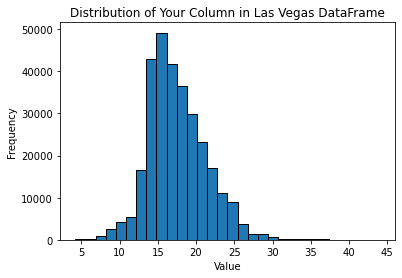

In [7]:
# Basic Statistics for a column in the Las Vegas DataFrame
min_temp_lv = vegas_df['Las Vegas_air_temp_set_1'].min()
max_temp_lv = vegas_df['Las Vegas_air_temp_set_1'].max()
mean_temp_lv = vegas_df['Las Vegas_air_temp_set_1'].mean()
std_temp_lv = vegas_df['Las Vegas_air_temp_set_1'].std()

print(f"Minimum Value: {min_temp_lv}")
print(f"Maximum Value: {max_temp_lv}")
print(f"Mean Value: {mean_temp_lv}")
print(f"Standard Deviation: {std_temp_lv}")

# Plotting the distribution for the Las Vegas column
plt.hist(vegas_df['Las Vegas_air_temp_set_1'], bins=30, edgecolor='black')
plt.title('Distribution of Your Column in Las Vegas DataFrame')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Minimum Precipitation Accumulation: 1.778
Maximum Precipitation Accumulation: 304.8
Mean Precipitation Accumulation: 48.82709215286598
Standard Deviation: 77.48711022786468


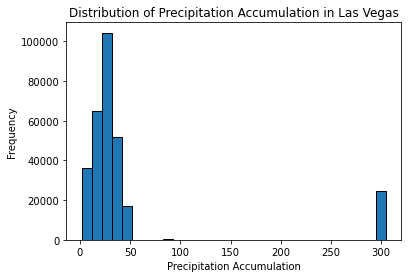

In [8]:
# Basic Statistics for the precipitation accumulation column
min_precip = vegas_df['Las Vegas_precip_accum_set_1'].min()
max_precip = vegas_df['Las Vegas_precip_accum_set_1'].max()
mean_precip = vegas_df['Las Vegas_precip_accum_set_1'].mean()
std_precip = vegas_df['Las Vegas_precip_accum_set_1'].std()

print(f"Minimum Precipitation Accumulation: {min_precip}")
print(f"Maximum Precipitation Accumulation: {max_precip}")
print(f"Mean Precipitation Accumulation: {mean_precip}")
print(f"Standard Deviation: {std_precip}")

# Plotting the distribution for the precipitation accumulation column
plt.hist(vegas_df['Las Vegas_precip_accum_set_1'], bins=30, edgecolor='black')
plt.title('Distribution of Precipitation Accumulation in Las Vegas')
plt.xlabel('Precipitation Accumulation')
plt.ylabel('Frequency')
plt.show()

Minimum Solar Radiation: 179.51
Maximum Solar Radiation: 975.0
Mean Solar Radiation: 237.04687226645572
Standard Deviation: 38.883160361968926


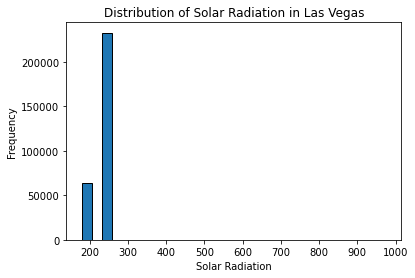

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your Las Vegas DataFrame as 'vegas_df'
# vegas_df = pd.read_csv('your_las_vegas_dataset.csv')  # Uncomment this line if you need to load the DataFrame

# Basic Statistics for the solar radiation column
min_solar_rad = vegas_df['Las Vegas_solar_radiation_set_1'].min()
max_solar_rad = vegas_df['Las Vegas_solar_radiation_set_1'].max()
mean_solar_rad = vegas_df['Las Vegas_solar_radiation_set_1'].mean()
std_solar_rad = vegas_df['Las Vegas_solar_radiation_set_1'].std()

print(f"Minimum Solar Radiation: {min_solar_rad}")
print(f"Maximum Solar Radiation: {max_solar_rad}")
print(f"Mean Solar Radiation: {mean_solar_rad}")
print(f"Standard Deviation: {std_solar_rad}")

# Plotting the distribution for the solar radiation column
plt.hist(vegas_df['Las Vegas_solar_radiation_set_1'], bins=30, edgecolor='black')
plt.title('Distribution of Solar Radiation in Las Vegas')
plt.xlabel('Solar Radiation')
plt.ylabel('Frequency')
plt.show()


In [6]:
# Extract features
X_vegas = vegas_df.drop(columns=['Las Vegas_air_temp_set_1', 'Las Vegas_wind_speed_set_1', 'Las Vegas_solar_radiation_set_1', 'Las Vegas_precip_accum_set_1', 'Las Vegas_STATION_NUM', 'Las Vegas_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])

# Define target variables
target_variables_vegas = ['Las Vegas_air_temp_set_1', 'Las Vegas_wind_speed_set_1', 'Las Vegas_solar_radiation_set_1', 'Las Vegas_precip_accum_set_1']

# Split the data into training and testing sets
X_train_vegas, X_test_vegas = train_test_split(X_vegas, test_size=0.2, random_state=42)

# Scale the features
scaler_vegas = StandardScaler()
X_train_scaled_vegas = scaler_vegas.fit_transform(X_train_vegas)
X_test_scaled_vegas = scaler_vegas.transform(X_test_vegas)

for target_variable_vegas in target_variables_vegas:
    # Extract target variable
    y_vegas = vegas_df[target_variable_vegas]

    # Split the target variable into training and testing sets
    y_train_vegas, y_test_vegas = train_test_split(y_vegas, test_size=0.2, random_state=42)

    # Create and train the SVR model
    svr_model_vegas = SVR(kernel='rbf')  # rbf to capture non-linear patterns
    svr_model_vegas.fit(X_train_scaled_vegas, y_train_vegas)

    # Make predictions on the test set
    y_pred_vegas = svr_model_vegas.predict(X_test_scaled_vegas)

    # Evaluate the model
    mse_vegas = mean_squared_error(y_test_vegas, y_pred_vegas)
    r2_vegas = r2_score(y_test_vegas, y_pred_vegas)

    print(f'Target Variable: {target_variable_vegas}')
    print(f'Mean Squared Error: {mse_vegas}')
    print(f'R-squared: {r2_vegas}')
    print('-' * 50)


Target Variable: Las Vegas_air_temp_set_1
Mean Squared Error: 5.182307839751587
R-squared: 0.6412056160617129
--------------------------------------------------
Target Variable: Las Vegas_wind_speed_set_1
Mean Squared Error: 0.35850465519117103
R-squared: 0.6074937738054635
--------------------------------------------------
Target Variable: Las Vegas_solar_radiation_set_1
Mean Squared Error: 430.9172363320667
R-squared: 0.725197535972637
--------------------------------------------------
Target Variable: Las Vegas_precip_accum_set_1
Mean Squared Error: 5679.479721699236
R-squared: 0.058636157292787705
--------------------------------------------------


# Miami Beach

Minimum Temperature: 19.53708333333334
Maximum Temperature: 34.35150000000001
Mean Temperature: 28.13254161314717
Standard Deviation: 2.887891949784119


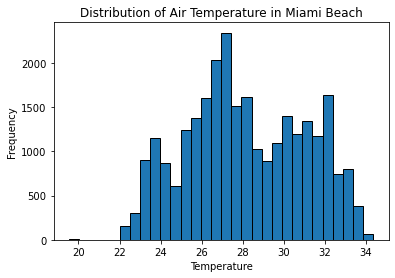

In [11]:
# Basic Statistics for air temperature
min_temp_mb = miami_df['Miami Beach_air_temp_set_1'].min()
max_temp_mb = miami_df['Miami Beach_air_temp_set_1'].max()
mean_temp_mb = miami_df['Miami Beach_air_temp_set_1'].mean()
std_temp_mb = miami_df['Miami Beach_air_temp_set_1'].std()

print(f"Minimum Temperature: {min_temp_mb}")
print(f"Maximum Temperature: {max_temp_mb}")
print(f"Mean Temperature: {mean_temp_mb}")
print(f"Standard Deviation: {std_temp_mb}")

# Plotting the distribution
plt.hist(miami_df['Miami Beach_air_temp_set_1'], bins=30, edgecolor='black')
plt.title('Distribution of Air Temperature in Miami Beach')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

Minimum Solar Radiation: 124.91666666666667
Maximum Solar Radiation: 1499.0
Mean Solar Radiation: 1319.762411230346
Standard Deviation: 146.30555282532302


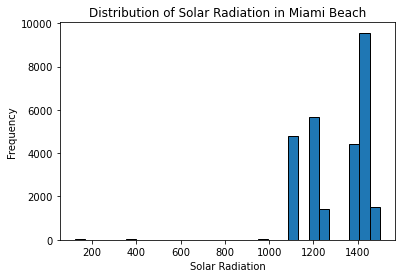

In [13]:
# Basic Statistics for solar radiation
min_solar_rad_mb = miami_df['Miami Beach_solar_radiation_set_1'].min()
max_solar_rad_mb = miami_df['Miami Beach_solar_radiation_set_1'].max()
mean_solar_rad_mb = miami_df['Miami Beach_solar_radiation_set_1'].mean()
std_solar_rad_mb = miami_df['Miami Beach_solar_radiation_set_1'].std()

print(f"Minimum Solar Radiation: {min_solar_rad_mb}")
print(f"Maximum Solar Radiation: {max_solar_rad_mb}")
print(f"Mean Solar Radiation: {mean_solar_rad_mb}")
print(f"Standard Deviation: {std_solar_rad_mb}")

# Plotting the distribution
plt.hist(miami_df['Miami Beach_solar_radiation_set_1'], bins=30, edgecolor='black')
plt.title('Distribution of Solar Radiation in Miami Beach')
plt.xlabel('Solar Radiation')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Extract features
X_miami = miami_df.drop(columns=['Miami Beach_air_temp_set_1', 'Miami Beach_wind_speed_set_1', 'Miami Beach_solar_radiation_set_1', 'Miami Beach_STATION_NUM', 'Miami Beach_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])

# Define target variables
target_variables_miami = ['Miami Beach_air_temp_set_1', 'Miami Beach_wind_speed_set_1', 'Miami Beach_solar_radiation_set_1']

# Split the data into training and testing sets
X_train_miami, X_test_miami = train_test_split(X_miami, test_size=0.2, random_state=42)

# Scale the features
scaler_miami = StandardScaler()
X_train_scaled_miami = scaler_miami.fit_transform(X_train_miami)
X_test_scaled_miami = scaler_miami.transform(X_test_miami)

for target_variable_miami in target_variables_miami:
    # Extract target variable
    y_miami = miami_df[target_variable_miami]

    # Split the target variable into training and testing sets
    y_train_miami, y_test_miami = train_test_split(y_miami, test_size=0.2, random_state=42)

    # Create and train the SVR model
    svr_model_miami = SVR(kernel='rbf')  # rbf to capture non-linear patterns
    svr_model_miami.fit(X_train_scaled_miami, y_train_miami)

    # Make predictions on the test set
    y_pred_miami = svr_model_miami.predict(X_test_scaled_miami)

    # Evaluate the model
    mse_miami = mean_squared_error(y_test_miami, y_pred_miami)
    r2_miami = r2_score(y_test_miami, y_pred_miami)

    print(f'Target Variable: {target_variable_miami}')
    print(f'Mean Squared Error: {mse_miami}')
    print(f'R-squared: {r2_miami}')
    print('-' * 50)


Target Variable: Miami Beach_air_temp_set_1
Mean Squared Error: 1.6928427695409478
R-squared: 0.7956280641911949
--------------------------------------------------
Target Variable: Miami Beach_wind_speed_set_1
Mean Squared Error: 0.008502967773956956
R-squared: 0.9438196491541936
--------------------------------------------------
Target Variable: Miami Beach_solar_radiation_set_1
Mean Squared Error: 20880.403862140865
R-squared: -0.044608826256791856
--------------------------------------------------


# Walt Disney Parks & Resorts

Minimum Temperature: 11.0
Maximum Temperature: 35.69381081081081
Mean Temperature: 24.203469494198476
Standard Deviation: 3.862781636672476


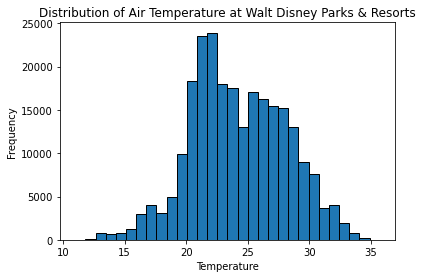

In [15]:
# Basic Statistics for air temperature at Walt Disney Parks & Resorts
min_temp_disney = disney_df['Walt Disney Parks & Resorts_air_temp_set_1'].min()
max_temp_disney = disney_df['Walt Disney Parks & Resorts_air_temp_set_1'].max()
mean_temp_disney = disney_df['Walt Disney Parks & Resorts_air_temp_set_1'].mean()
std_temp_disney = disney_df['Walt Disney Parks & Resorts_air_temp_set_1'].std()

print(f"Minimum Temperature: {min_temp_disney}")
print(f"Maximum Temperature: {max_temp_disney}")
print(f"Mean Temperature: {mean_temp_disney}")
print(f"Standard Deviation: {std_temp_disney}")

# Plotting the distribution
plt.hist(disney_df['Walt Disney Parks & Resorts_air_temp_set_1'], bins=30, edgecolor='black')
plt.title('Distribution of Air Temperature at Walt Disney Parks & Resorts')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


Minimum Precipitation Accumulation: 53.086
Maximum Precipitation Accumulation: 106.934
Mean Precipitation Accumulation: 92.36673237798874
Standard Deviation: 15.563038027378255


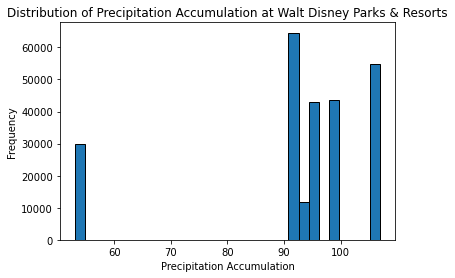

In [16]:
# Basic Statistics for precipitation accumulation at Walt Disney Parks & Resorts
min_precip_disney = disney_df['Walt Disney Parks & Resorts_precip_accum_set_1'].min()
max_precip_disney = disney_df['Walt Disney Parks & Resorts_precip_accum_set_1'].max()
mean_precip_disney = disney_df['Walt Disney Parks & Resorts_precip_accum_set_1'].mean()
std_precip_disney = disney_df['Walt Disney Parks & Resorts_precip_accum_set_1'].std()

print(f"Minimum Precipitation Accumulation: {min_precip_disney}")
print(f"Maximum Precipitation Accumulation: {max_precip_disney}")
print(f"Mean Precipitation Accumulation: {mean_precip_disney}")
print(f"Standard Deviation: {std_precip_disney}")

# Plotting the distribution
plt.hist(disney_df['Walt Disney Parks & Resorts_precip_accum_set_1'], bins=30, edgecolor='black')
plt.title('Distribution of Precipitation Accumulation at Walt Disney Parks & Resorts')
plt.xlabel('Precipitation Accumulation')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Extract features
X_disney = disney_df.drop(columns=['Walt Disney Parks & Resorts_air_temp_set_1', 'Walt Disney Parks & Resorts_wind_speed_set_1', 'Walt Disney Parks & Resorts_precip_accum_set_1', 'Walt Disney Parks & Resorts_STATION_NUM', 'Walt Disney Parks & Resorts_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])

# Define target variables
target_variables_disney = ['Walt Disney Parks & Resorts_air_temp_set_1', 'Walt Disney Parks & Resorts_wind_speed_set_1', 'Walt Disney Parks & Resorts_precip_accum_set_1']

# Split the data into training and testing sets
X_train_disney, X_test_disney = train_test_split(X_disney, test_size=0.2, random_state=42)

# Scale the features
scaler_disney = StandardScaler()
X_train_scaled_disney = scaler_disney.fit_transform(X_train_disney)
X_test_scaled_disney = scaler_disney.transform(X_test_disney)

for target_variable_disney in target_variables_disney:
    # Extract target variable
    y_disney = disney_df[target_variable_disney]

    # Split the target variable into training and testing sets
    y_train_disney, y_test_disney = train_test_split(y_disney, test_size=0.2, random_state=42)

    # Create and train the SVR model
    svr_model_disney = SVR(kernel='rbf')  # rbf to capture non-linear patterns
    svr_model_disney.fit(X_train_scaled_disney, y_train_disney)

    # Make predictions on the test set
    y_pred_disney = svr_model_disney.predict(X_test_scaled_disney)

    # Evaluate the model
    mse_disney = mean_squared_error(y_test_disney, y_pred_disney)
    r2_disney = r2_score(y_test_disney, y_pred_disney)

    print(f'Target Variable: {target_variable_disney}')
    print(f'Mean Squared Error: {mse_disney}')
    print(f'R-squared: {r2_disney}')
    print('-' * 50)


Target Variable: Walt Disney Parks & Resorts_air_temp_set_1
Mean Squared Error: 1.256185687529678
R-squared: 0.9157632753395714
--------------------------------------------------
Target Variable: Walt Disney Parks & Resorts_wind_speed_set_1
Mean Squared Error: 0.2119067213882335
R-squared: 0.6959672819324398
--------------------------------------------------
Target Variable: Walt Disney Parks & Resorts_precip_accum_set_1
Mean Squared Error: 15.325468280252604
R-squared: 0.935462662578689
--------------------------------------------------
